<a href="https://colab.research.google.com/github/palarunava/machine-learning-courses/blob/main/machine-learning-specialization/supervised-ml-regression-classification/C1_W1_Lab03_Cost_function_Soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!curl -L https://raw.githubusercontent.com/palarunava/machine-learning-courses/refs/heads/main/machine-learning-specialization/supervised-ml-regression-classification/deeplearning.mplstyle -o deeplearning.mplstyle
!curl -L https://raw.githubusercontent.com/palarunava/machine-learning-courses/refs/heads/main/machine-learning-specialization/supervised-ml-regression-classification/lab_utils_uni.py -o lab_utils_uni.py
!curl -L https://raw.githubusercontent.com/palarunava/machine-learning-courses/refs/heads/main/machine-learning-specialization/supervised-ml-regression-classification/lab_utils_common.py -o lab_utils_common.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4889  100  4889    0     0  20826      0 --:--:-- --:--:-- --:--:-- 20893
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14581  100 14581    0     0  51757      0 --:--:-- --:--:-- --:--:-- 51705
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3258  100  3258    0     0  16827      0 --:--:-- --:--:-- --:--:-- 16880


In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

In [8]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

In [9]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [18]:
from IPython.display import display
from ipywidgets import IntSlider

int_slider = IntSlider(
    min=0,
    max=400,
    step=10,
    value=0,
    description='Parameters:',
    continuous_update=False
)
display(int_slider)

def plt_intuition(x_train, y_train):

    w_range = np.array([200-200,200+200])
    tmp_b = 100

    w_array = np.arange(*w_range, 5)
    cost = np.zeros_like(w_array)
    for i in range(len(w_array)):
        tmp_w = w_array[i]
        cost[i] = compute_cost(x_train, y_train, tmp_w, tmp_b)

    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,4))
    ax[0].cla()
    ax[1].cla()
    f_wb = np.dot(x_train, w) + tmp_b

    fig.canvas.toolbar_position = 'bottom'

    mk_cost_lines(x_train, y_train, w, tmp_b, ax[0])
    plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])

    ax[1].plot(w_array, cost)
    cur_cost = compute_cost(x_train, y_train, w, tmp_b)
    ax[1].scatter(w,cur_cost, s=100, color=dldarkred, zorder= 10, label= f"cost at w={w}")
    ax[1].hlines(cur_cost, ax[1].get_xlim()[0],w, lw=4, color=dlpurple, ls='dotted')
    ax[1].vlines(w, ax[1].get_ylim()[0],cur_cost, lw=4, color=dlpurple, ls='dotted')
    ax[1].set_title("Cost vs. w, (b fixed at 100)")
    ax[1].set_ylabel('Cost')
    ax[1].set_xlabel('w')
    ax[1].legend(loc='upper center')
    fig.suptitle(f"Minimize Cost: Current Cost = {cur_cost:0.0f}", fontsize=12)
    plt.show()

def mk_cost_lines(x,y,w,b, ax):
    ''' makes vertical cost lines'''
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False
    for p in zip(x,y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1],f_wb_p, lw=3, color=dlpurple, ls='dotted', label=label)
        label='' #just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',color=dlpurple,
            xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(x))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.15,0.02,cstr, transform=ax.transAxes, color=dlpurple)

def plt_house_x(X, y,f_wb=None, ax=None):
    ''' plot house with aXis '''
    if not ax:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")

    ax.set_title("Housing Prices")
    ax.set_ylabel('Price (in 1000s of dollars)')
    ax.set_xlabel(f'Size (1000 sqft)')
    if f_wb is not None:
        ax.plot(X, f_wb,  c=dlblue, label="Our Prediction")
    ax.legend()

IntSlider(value=0, continuous_update=False, description='Parameters:', max=400, step=10)

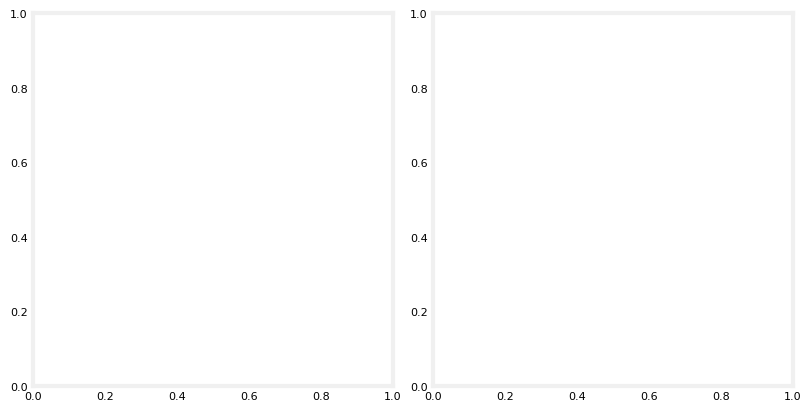

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

In [10]:
plt_intuition(x_train,y_train)

In [ ]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [ ]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

In [ ]:
soup_bowl()